In [60]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [61]:
dataset, dataset_info = tfds.load("malaria", with_info=True, shuffle_files=True)

In [66]:
def split(Dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
    DATASET_SIZE = len(Dataset)

    Train_Dataset = Dataset.take(int(TRAIN_RATIO*DATASET_SIZE))
    val_test_dataset = Dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
    Validation_Dataset = val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))
    Test_Dataset = val_test_dataset.skip(int(TEST_RATIO*DATASET_SIZE))

    return Train_Dataset, Validation_Dataset, Test_Dataset

In [67]:
TRAIN_RATIO=0.8
VAL_RATIO=0.1
TEST_RATIO=0.1

train_ds, val_ds, test_ds = split(dataset['train'], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)

In [68]:
dataset

{'train': <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [69]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

In [70]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

22046
2755
2757


In [71]:
def get_label_str(label):
  if label ==0:
    return "parasitized"
  else:
    return "uninfected"

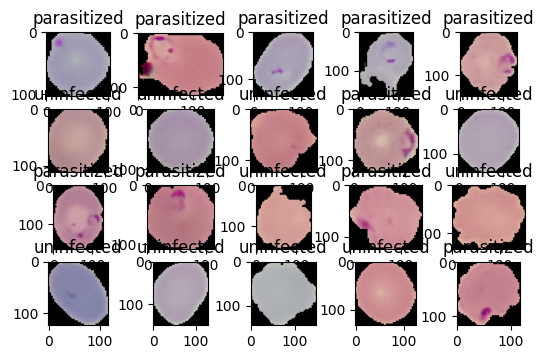

In [75]:
for i, sample in enumerate(train_ds.take(20)):
  ax = plt.subplot(5,5, i+1)
  plt.imshow(sample['image'])
  plt.title(get_label_str(sample['label'].numpy()))


In [81]:
IM_SIZE =224

In [82]:
def resize_rescale(inputs):
  return tf.image.resize(inputs['image'], (IM_SIZE, IM_SIZE))/255.,inputs['label']

In [83]:
train_dataset = train_ds.map(resize_rescale)

In [89]:
for image, label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [90]:
np.unique(image)

array([0.        , 0.00282581, 0.00311563, ..., 0.86877066, 0.86949104,
       0.8751619 ], dtype=float32)